In [1]:
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

In [2]:
import random
p = 0.001
cols_list = ["app_name", "author.steamid", "author.num_reviews"]
df = pd.read_csv("steam_reviews.csv")#, header = 0, skiprows = lambda i : i>0 and random.random() > p)

# RQ5

**Top 10 most popular rewievers based on the number of reviews made**

In [4]:
df[["author.steamid", "author.num_reviews"]].nlargest(400, "author.num_reviews")

,author.steamid,author.num_reviews
13093694,76561198103272004,4398046511108
5663041,76561198848008157,4398046511105
504382,76561198125392509,5236
575674,76561198125392509,5236
656318,76561198125392509,5236
...,...,...
11826505,76561198272374716,2622
21532650,76561198094803808,2622
6953153,76561198272374716,2621
7384894,76561198272374716,2621


**Application reviewed by the most popular author:**

In [5]:
#looking for the most popular author based on the number of reviews done
most_popular = df[df["author.num_reviews"] == df["author.num_reviews"].max()]
#memorizing the steamid of the most popular author
author_id = int(most_popular["author.steamid"])

#games = df.loc[(df["author.steamid"] == author_id)]
games = df[df["author.steamid"] == 76561198272374716]
games

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
1001551,1001552,4000,Garry's Mod,71638846,russian,"Уникальная, великолепная и увлекательная игра....",1593422850,1593422900,True,154,...,True,False,False,76561198272374716,11222,2623,49830.0,0.0,49830.0,1.593377e+09
1831244,1831245,381210,Dead by Daylight,71649601,russian,"Если вас достали настолько, что вы хотите кого...",1593434231,1593434250,True,70,...,True,False,False,76561198272374716,11219,2620,875.0,5.0,747.0,1.610697e+09
2948330,2948331,242760,The Forest,36527271,russian,[h1]«The Forest»[/h1]\nВыживание + приключение...,1510734940,1510735884,True,83,...,True,False,True,76561198272374716,11219,2620,546.0,0.0,530.0,1.526486e+09
3097317,3097318,686600,Rapture Rejects,75979711,russian,[b]Королевская битва по мотивам Cyanide & Happ...,1600119855,1600119987,True,43,...,False,True,True,76561198272374716,11219,2620,42.0,0.0,42.0,1.600119e+09
3241366,3241367,834910,ATLAS,55599662,russian,[h1]«Atlas»[/h1]\n[b][i]MMO-экшен-выживалка AR...,1571052975,1571054346,True,84,...,False,True,True,76561198272374716,11219,2620,1159.0,0.0,920.0,1.571073e+09
4587027,4587028,431960,Wallpaper Engine,71640162,russian,"Программа для тех, кто любит украшать свой раб...",1593424408,1593424408,True,85,...,False,False,False,76561198272374716,11219,2620,434.0,0.0,434.0,1.593877e+09
5612645,5612646,413150,Stardew Valley,71648575,russian,"Этот симулятор фермера и семьянина, созданный ...",1593433244,1593433244,True,193,...,True,False,False,76561198272374716,11225,2625,2807.0,0.0,2807.0,1.561848e+09
6953153,6953154,945360,Among Us,77419472,russian,[h1]«Among Us»[/h1]\n[b][i]Игра с самыми смешн...,1602452817,1602453072,True,805,...,False,False,False,76561198272374716,11219,2621,394.0,0.0,385.0,1.608042e+09
7384894,7384895,252490,Rust,71560552,russian,Хоть эту игру нельзя назвать первопроходцем жа...,1593339595,1593339595,True,127,...,True,False,False,76561198272374716,11219,2621,9094.0,0.0,9091.0,1.608534e+09
7839787,7839788,858210,Nova Drift,50278070,russian,[h1]«Nova Drift»[/h1]\n[b]Уникальный сплав Scr...,1555999456,1555999496,True,37,...,False,True,True,76561198272374716,11219,2621,49.0,0.0,49.0,1.555843e+09


**Applications purchased and got for free by the most popular author**

In [9]:
#purch = df[["app_name", "steam_purchase", "author.steamid"]]
purch = df[df["author.steamid"] == 76561198272374716]
count_purchase = 0
count_free = 0
total = 0

#iterate the purch DataFrame created to check if the games where purchased or not
for index, row in purch.iterrows():
    if(row["steam_purchase"]):
        count_purchase += 1
    if(row["received_for_free"]):
        count_free += 1
    total += 1

#using the total number of games, i will calculate the percentage for the values
perc_purch = (count_purchase/total)*100
perc_free = (count_free/total)*100

print("The number of games PURCHASED by the most popular author is:\t", str(count_purchase),"[in percentage:", round(perc_purch, 2),"%]"
      "\nInstead, the number of games he RECEIVED FOR FREE is:\t\t", str(count_free), "[in percentage:", round(perc_free, 2),"%]")

The number of games PURCHASED by the most popular author is:	 12 [in percentage: 54.55 %]
Instead, the number of games he RECEIVED FOR FREE is:		 7 [in percentage: 31.82 %]


**Number of positive and negatives reviews for both games purchased and got for free**

In [7]:
#using the iterator as in the last cell, we will check and count every review and store the results in different variables
p_purch = 0
n_purch = 0
tot_purch = 0

p_free = 0
n_free = 0
tot_free = 0

for index, row in purch.iterrows():
    if(row["steam_purchase"]):
        if(row["recommended"]): p_purch += 1
        else: n_purch += 1
        tot_purch += 1
    if(row["received_for_free"]):
        if(row["recommended"]): p_free += 1
        else: n_free += 1
        tot_free += 1
perc_purch_p = (p_purch/tot_purch)*100
perc_purch_n = (n_purch/tot_purch)*100

perc_free_p = (p_free/tot_free)*100
perc_free_n = (n_free/tot_free)*100

print("PURCHASED:","\n\tThe number of POSITIVE (recommended) games is:\t\t", str(p_purch), "[in percentage:", round(perc_purch_p, 2) ,"%]"
     "\n\tThe number of NEGATIVE (not recommended) games is:\t", str(n_purch), "[in percentage:", round(perc_purch_n, 2) ,"%]")
print("\nRECEIVED FOR FREE:","\n\tThe number of POSITIVE (recommended) games is:\t\t", str(p_free), "[in percentage:", round(perc_free_p, 2) ,"%]",
     "\n\tThe number of NEGATIVE (not recommended) games is:\t", str(n_free), "[in percentage:", round(perc_free_n, 2) ,"%]")

PURCHASED: 
	The number of POSITIVE (recommended) games is:		 12 [in percentage: 100.0 %]
	The number of NEGATIVE (not recommended) games is:	 0 [in percentage: 0.0 %]

RECEIVED FOR FREE: 
	The number of POSITIVE (recommended) games is:		 7 [in percentage: 100.0 %] 
	The number of NEGATIVE (not recommended) games is:	 0 [in percentage: 0.0 %]


# RQ6

**Average time a user lets pass before updating a review**

In [3]:
from datetime import datetime as dt
import time

created_timestamp = [x for x in df.timestamp_created if not pd.isnull(x)]

updated_timestamp = [x for x in df.timestamp_updated if not pd.isnull(x)]

In [4]:
comb = zip(created_timestamp, updated_timestamp)
diff = []
#print(updated[1], created[1])
for c, u in comb:
    if (c != u):
        diff.append(u-c)

In [5]:
mean = 0
for i in diff:
    mean += i
mean = mean//len(diff)
day = mean // (24 * 3600)
mean = mean % (24 * 3600)
hour = mean // 3600
mean %= 3600
minute = mean // 60
minute += hour*60

print("The average time a user lets pass before updating a review is:", day, "days and", minute, "minutes")

The average time a user lets pass before updating a review is: 321 days and 46 minutes


**Top 3 authors that usually update their reviews**

In [8]:
up = df[df["timestamp_created"] != df["timestamp_updated"]]

In [37]:
#The authors with most updated reviews, and the number of times they updated a review
out = up["author.steamid"].value_counts()[0:3]
out

76561198192166873    95
76561198206999976    61
76561198072450805    60
Name: author.steamid, dtype: int64

Text(0, 0.5, '# of updated reviews')

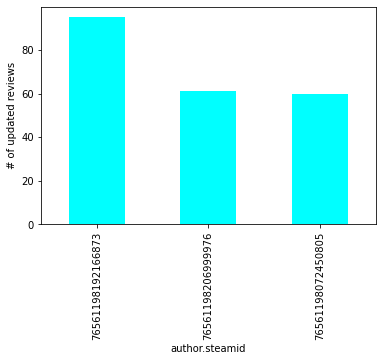

In [45]:
#plot the result
out.plot.bar(color = "cyan")
plt.xlabel("author.steamid")
plt.ylabel("# of updated reviews")